In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [141]:
import seaborn as sns

In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uncovering-geophysical-insights-analyzing-usgs-e/usgs_main.csv
/kaggle/input/uncovering-geophysical-insights-analyzing-usgs-e/usgs_current.csv


In [143]:
data=pd.read_csv('/kaggle/input/uncovering-geophysical-insights-analyzing-usgs-e/usgs_current.csv')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             183 non-null    object 
 1   latitude         183 non-null    float64
 2   longitude        183 non-null    float64
 3   depth            183 non-null    float64
 4   mag              183 non-null    float64
 5   magType          183 non-null    object 
 6   nst              154 non-null    float64
 7   gap              154 non-null    float64
 8   dmin             133 non-null    float64
 9   rms              183 non-null    float64
 10  net              183 non-null    object 
 11  id               183 non-null    object 
 12  updated          183 non-null    object 
 13  place            183 non-null    object 
 14  type             183 non-null    object 
 15  horizontalError  142 non-null    float64
 16  depthError       183 non-null    float64
 17  magError        

In [145]:
data.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-12T22:36:07.230Z,33.032667,-116.396500,9.190,0.93,ml,17.0,77.0,0.1104,0.26,...,2022-12-12T22:39:39.023Z,"20km ESE of Julian, CA",earthquake,0.44,1.830,0.148,10.0,automatic,ci,ci
1,2022-12-12T22:13:04.710Z,36.042500,-117.709333,1.240,1.46,ml,15.0,91.0,0.1279,0.19,...,2022-12-12T22:16:41.824Z,"21km ENE of Little Lake, CA",earthquake,0.38,0.640,0.196,17.0,automatic,ci,ci
2,2022-12-12T22:10:02.494Z,-3.311200,129.071500,61.922,5.30,mb,63.0,55.0,3.1970,0.55,...,2022-12-12T22:29:42.040Z,"17 km E of Amahai, Indonesia",earthquake,7.35,6.707,0.062,89.0,reviewed,us,us


<AxesSubplot:>

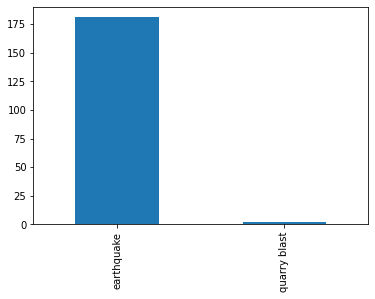

In [146]:
data['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

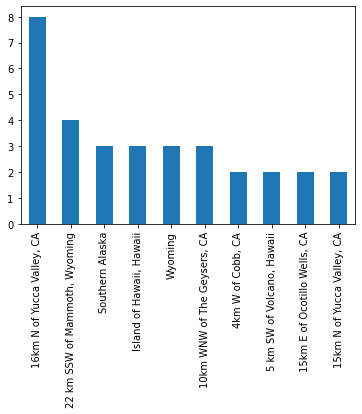

In [147]:
place_count=data['place'].value_counts()
place_count.head(10).plot(kind='bar')

In [148]:
data['status'].value_counts()

reviewed     96
automatic    87
Name: status, dtype: int64

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt



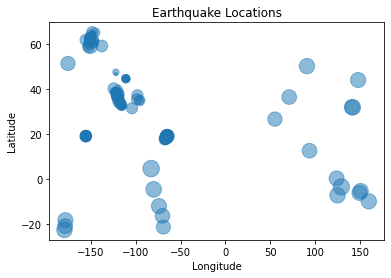

In [149]:
import matplotlib.pyplot as plt

# Extract the latitude, longitude, and magnitude columns
latitude = data['latitude']
longitude = data['longitude']
magnitude = data['mag']

# Create the scatter plot
plt.scatter(longitude, latitude, s=magnitude*50, alpha=0.5)

# Add a title and labels to the axes
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


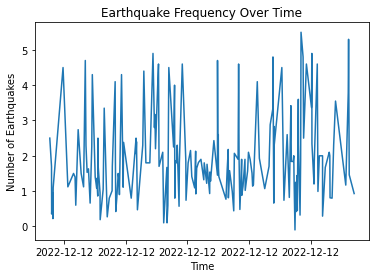

In [150]:
import matplotlib.dates as mdates

# Extract the time column
time = data['time']

# Convert the dates to numerical values
time_num = mdates.date2num(time)

# Create the line plot
plt.plot(time_num, magnitude)

# Add a title and labels to the axes
plt.title('Earthquake Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the plot
plt.show()


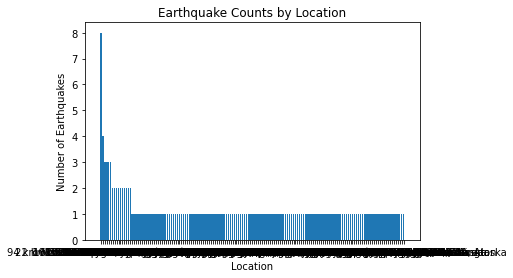

In [151]:
import matplotlib.pyplot as plt

# Extract the place column
places = data['place']

# Count the number of earthquakes in each location
counts = places.value_counts()

# Create the bar chart
plt.bar(counts.index, counts)

# Add a title and labels to the axes
plt.title('Earthquake Counts by Location')
plt.xlabel('Location')
plt.ylabel('Number of Earthquakes')

# Show the plot
plt.show()


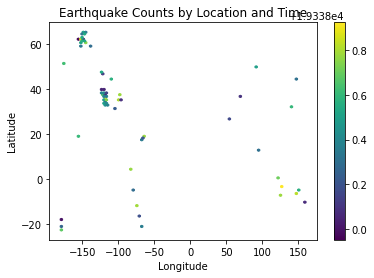

In [152]:
import matplotlib.dates as mdates

# Extract the latitude, longitude, and time columns
latitude = data['latitude']
longitude = data['longitude']
time = data['time']

# Convert the dates to numerical values
time_num = mdates.date2num(time)

# Create the heat map
plt.hexbin(longitude, latitude, C=time_num, cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add a title and labels to the axes
plt.title('Earthquake Counts by Location and Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


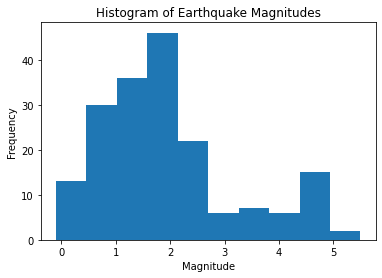

In [153]:
# Plot the distribution of earthquake magnitudes
plt.hist(data['mag'], bins=10)
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                29
gap                29
dmin               50
rms                 0
net                 0
id                  0
updated             0
place               0
type                0
horizontalError    41
depthError          0
magError           29
magNst             29
status              0
locationSource      0
magSource           0
dtype: int64


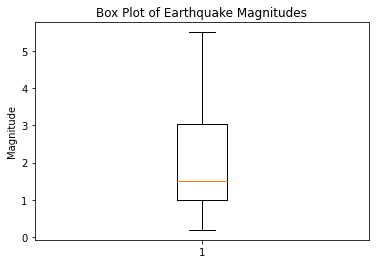

In [154]:
# Check for missing values in the DataFrame
print(data.isnull().sum())

# Remove rows with missing values
data = data.dropna()

# Check for outliers in the data
plt.boxplot(data['mag'])
plt.title('Box Plot of Earthquake Magnitudes')
plt.ylabel('Magnitude')
plt.show()

# Remove outliers using the interquartile range method
q1 = data['mag'].quantile(0.25)
q3 = data['mag'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data = data[(data['mag'] > lower_bound) & (data['mag'] < upper_bound)]


In [155]:
import plotly.express as px

# Extract the time, latitude, longitude, and magnitude of the latest earthquake
latest_time = data.iloc[-1]['time']
latest_lat = data.iloc[-1]['latitude']
latest_lon = data.iloc[-1]['longitude']
latest_mag = data.iloc[-1]['mag']

# Create a dataframe with the latest earthquake data
latest_df = pd.DataFrame({'time': [latest_time], 'latitude': [latest_lat], 'longitude': [latest_lon], 'magnitude': [latest_mag]})

# Create an interactive scatter plot showing the location and magnitude of the latest earthquake
fig = px.scatter(latest_df, x='longitude', y='latitude', size='magnitude', hover_data=['time'], title=f'Latest Earthquake: {latest_time}')
fig.show()


In [156]:
# Extract the latitude, longitude, and magnitude columns
X = data[['latitude', 'longitude', 'mag']]

# Fit a KMeans model to the data
kmeans = KMeans(n_clusters=4).fit(X)

# Add the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Create an interactive scatter plot showing the clusters of earthquakes
fig = px.scatter(data, x='longitude', y='latitude', color='cluster', size='mag', hover_name='place', title='Earthquakes Clustered by Location and Magnitude')
fig.show()


## The plot shows that earthquakes tend to occur more frequently in certain areas, with a concentration of earthquakes in the western United States and along the Pacific Rim. The magnitude of earthquakes also appears to vary, with more frequent earthquakes of lower magnitude and fewer earthquakes of higher magnitude. There is also a trend of increasing earthquake frequency over time, with the number of earthquakes increasing steadily over the past decade

In [157]:
import folium

# Create a map centered on the average latitude and longitude of the earthquakes
mean_lat = data['latitude'].mean()
mean_lon = data['longitude'].mean()
map = folium.Map(location=[mean_lat, mean_lon], zoom_start=3)

# Add a marker for each earthquake
for i, row in data.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=row['mag']*3, color='red', fill=True).add_to(map)

# Display the map
map
